# Kaggle Segmentation Challange

## Imports

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv('/Users/alex/Documents/Mall_Customers.csv')

## EDA

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Age Distribution

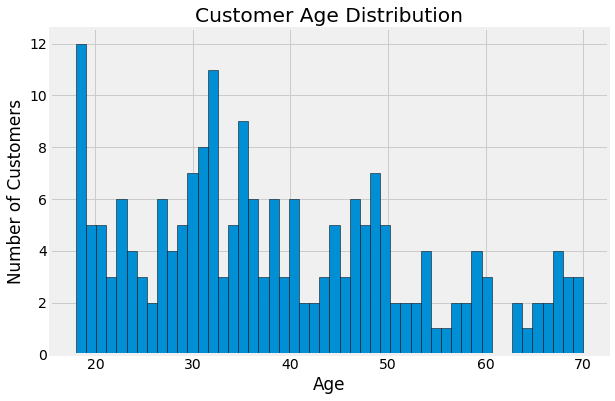

In [6]:
plt.figure(figsize = (10, 6))

# Histogram 
plt.style.use('fivethirtyeight')
plt.hist(df['Age'], bins = 50, edgecolor = 'k');
plt.xlabel('Age'); plt.ylabel('Number of Customers'); 
plt.title('Customer Age Distribution');

### Income Distribution

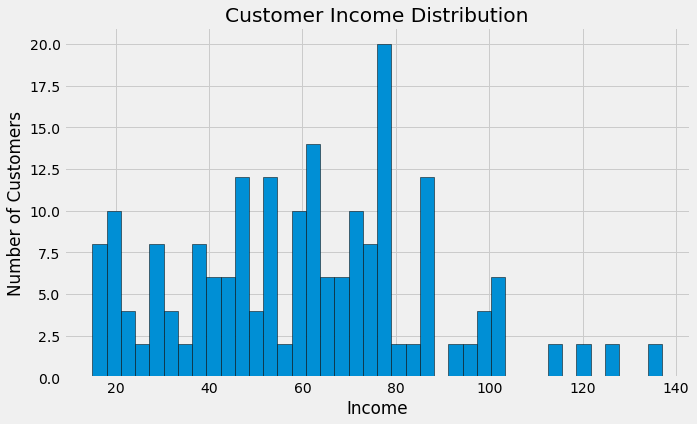

In [7]:
plt.figure(figsize = (10, 6))

# Histogram 
plt.style.use('fivethirtyeight')
plt.hist(df['Annual Income (k$)'], bins = 40, edgecolor = 'k');
plt.xlabel('Income'); plt.ylabel('Number of Customers'); 
plt.title('Customer Income Distribution');

### Spending Score Distribution

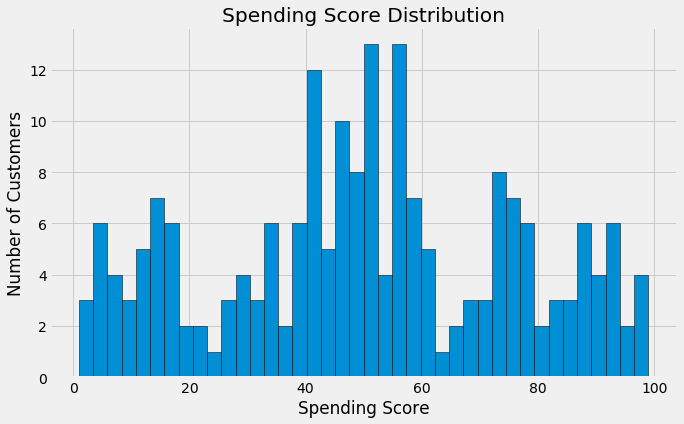

In [8]:
plt.figure(figsize = (10, 6))

# Histogram 
plt.style.use('fivethirtyeight')
plt.hist(df['Spending Score (1-100)'], bins = 40, edgecolor = 'k');
plt.xlabel('Spending Score'); plt.ylabel('Number of Customers'); 
plt.title('Spending Score Distribution');

## Gender Distribution

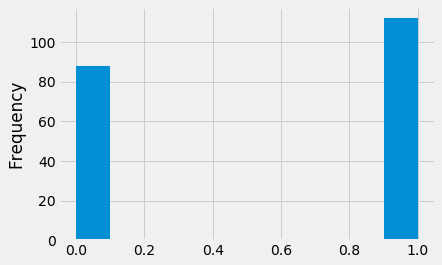

In [9]:
# Male == 0; Female == 1
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df['Gender'].plot.hist();

### Correlations

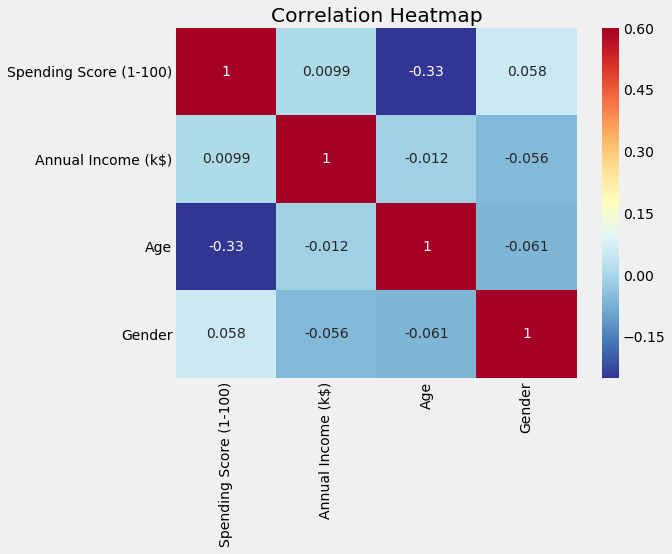

In [10]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(df[['Spending Score (1-100)', 'Annual Income (k$)', 'Age', 'Gender']].corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

### Kernel Density Estimation

#### Gender - Age KDE

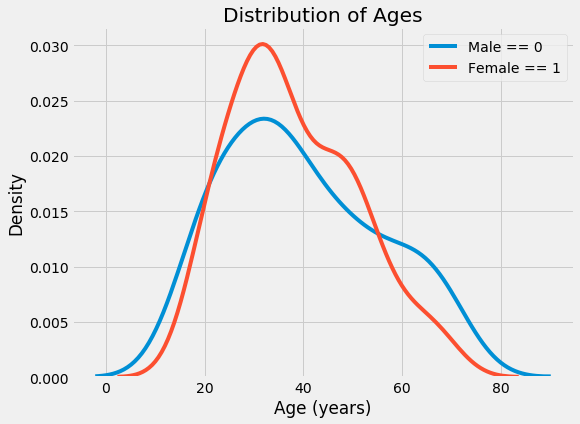

In [11]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['Gender'] == 0, 'Age'], label = 'Male == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['Gender'] == 1, 'Age'], label = 'Female == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

#### Gender - Income KDE

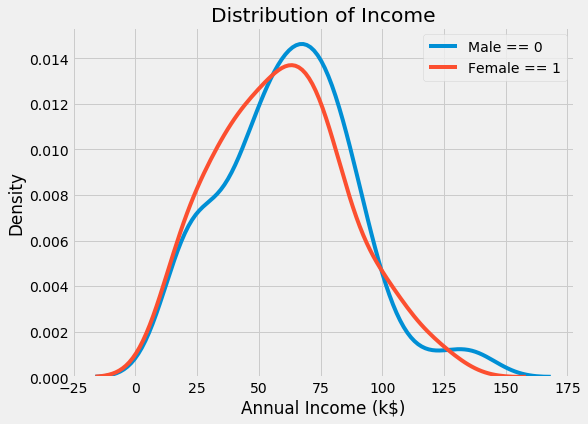

In [12]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['Gender'] == 0, 'Annual Income (k$)'], label = 'Male == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['Gender'] == 1, 'Annual Income (k$)'], label = 'Female == 1')

# Labeling of plot
plt.xlabel('Annual Income (k$)'); plt.ylabel('Density'); plt.title('Distribution of Income');

#### Gender - Spending Score KDE

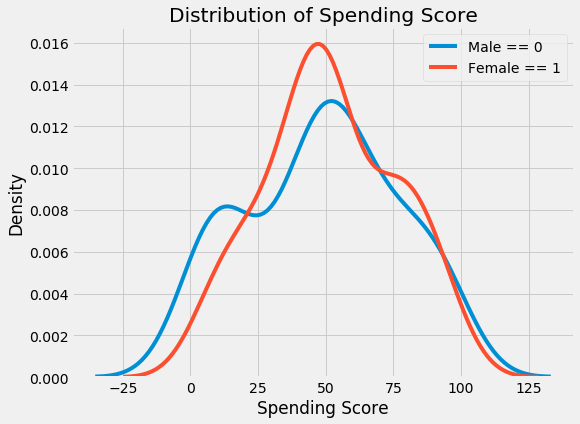

In [13]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['Gender'] == 0, 'Spending Score (1-100)'], label = 'Male == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['Gender'] == 1, 'Spending Score (1-100)'], label = 'Female == 1')

# Labeling of plot
plt.xlabel('Spending Score'); plt.ylabel('Density'); plt.title('Distribution of Spending Score');

## Normalization

### Manage Skewness

In [14]:
# log transformation to manage skewness
df['Age_log'] = np.log(df.Age)

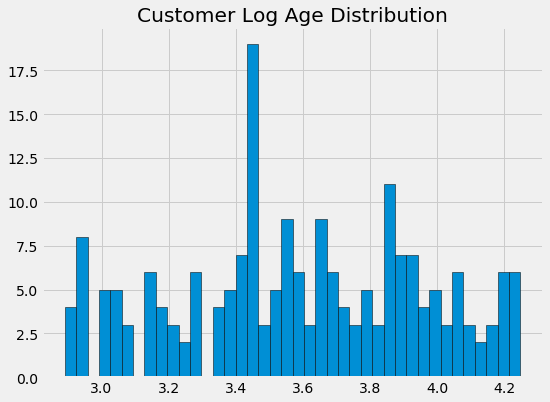

In [15]:
plt.figure(figsize = (8, 6))

# Histogram 
plt.style.use('fivethirtyeight')
plt.hist(df['Age_log'], bins = 40, edgecolor = 'k');
#plt.xlabel('Age_log'); plt.ylabel('Number of Customers'); 
plt.title('Customer Log Age Distribution');

In [16]:
# drop customerID column
df = df.drop('CustomerID', axis=1)


### Sklearn Normalization

In [17]:
# Sklearn scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['Age_log', 'Annual Income (k$)', 'Spending Score (1-100)']])
df_norm = scaler.transform(df[['Age_log', 'Annual Income (k$)', 'Spending Score (1-100)']])
df_norm = pd.DataFrame(df_norm)
df_norm['Gender'] = df['Gender']

/Users/alex/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [18]:
pd.DataFrame(df_norm).describe()

,0,1,2,Gender
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,5.578871e-16,-6.128431e-16,-1.121325e-16,0.560000
std,1.002509e+00,1.002509e+00,1.002509e+00,0.497633
min,-1.922144e+00,-1.738999e+00,-1.910021e+00,0.000000
25%,-6.435681e-01,-7.275093e-01,-5.997931e-01,0.000000
50%,-2.907786e-02,3.587926e-02,-7.764312e-03,1.000000
75%,8.129292e-01,6.656748e-01,8.851316e-01,1.000000
max,1.787050e+00,2.917671e+00,1.894492e+00,1.000000


## KMeans Segmentaion

### Elbow Method

Trying to figure out number of clusters

In [19]:
sse = {}
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(df_norm)
    sse[k] = kmeans.inertia_

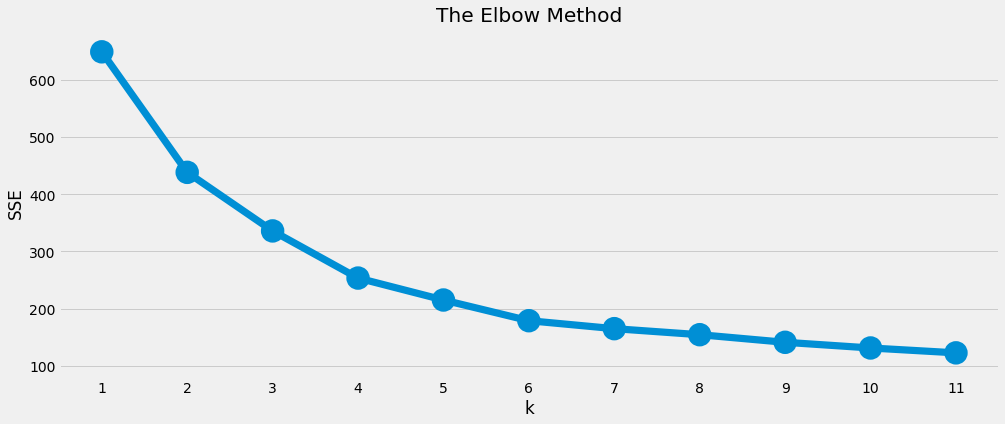

In [20]:
# Add the plot title
plt.figure(1 , figsize = (15 ,6))
plt.title('The Elbow Method')

# Add X label
plt.xlabel('k')

# Add Y label
plt.ylabel('SSE')

# Plot SSE values for each key
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Looks like we can choose 4 or 6 number of clusters.

### KMeans (6 clusters)

In [21]:
# lets fit 5 clusters model
kmeans = KMeans(n_clusters=5, random_state=1) 
kmeans.fit(df_norm)

# extract cluster labels
cluster_labels = kmeans.labels_

In [22]:
# add new column with clusters to df
df['Clusters'] = cluster_labels

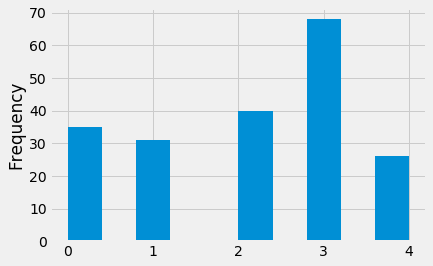

In [23]:
# check cluster distribution
df.Clusters.plot.hist()

In [24]:
# mean stats by Cluster
df.groupby("Clusters").mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_log
Clusters,,,,,
0,0.600000,23.742857,57.857143,42.885714,3.148475
1,0.483871,44.387097,89.774194,18.483871,3.776380
2,0.550000,32.875000,86.100000,81.525000,3.486117
3,0.573529,52.617647,46.779412,40.573529,3.943948
4,0.576923,25.769231,26.115385,74.846154,3.228294


## Feature Engeneering (Scorring and Segments)

### Create labels for Income, Age and Score based on equal percentile groups

In [25]:
# create labels for income, age, score
i_labels = range(1, 4); a_labels = range(1, 6); s_labels = range(1, 4)

# assign these labels to three equal percentile groups 
i_groups = pd.qcut(df['Annual Income (k$)'], q=3, labels=i_labels)

# assign these labels to five equal percentile groups 
a_groups = pd.qcut(df['Age'], q=5, labels=a_labels)

# assign these labels to three equal percentile groups 
s_groups = pd.qcut(df['Spending Score (1-100)'], q=3, labels=s_labels)

# Create new columns 'I', 'A' and 'S'
df = df.assign(I=i_groups.values, A=a_groups.values, S=s_groups.values)

In [26]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_log,Clusters,I,A,S
0,0,19,15,39,2.944439,4,1,1,1
1,0,21,15,81,3.044522,4,1,1,3
2,1,20,16,6,2.995732,0,1,1,1
3,1,23,16,77,3.135494,4,1,1,3
4,1,31,17,40,3.433987,4,1,2,1


### Create Customer Segments and Score

In [27]:
# create score and segment based on new values
df['Score'] = df[['I','A','S']].sum(axis=1)

df['Segment'] = (df['I'].astype(str)+df['A'].astype(str)+df['S'].astype(str)).astype(int)

In [28]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_log,Clusters,I,A,S,Score,Segment
0,0,19,15,39,2.944439,4,1,1,1,3.0,111
1,0,21,15,81,3.044522,4,1,1,3,5.0,113
2,1,20,16,6,2.995732,0,1,1,1,3.0,111
3,1,23,16,77,3.135494,4,1,1,3,5.0,113
4,1,31,17,40,3.433987,4,1,2,1,4.0,121


In [29]:
print('Number of segments: ', df.Segment.nunique())
print('Number of Score Values: ', df.Score.nunique())

Number of segments:  31
Number of Score Values:  7


### Summary metrics for Score

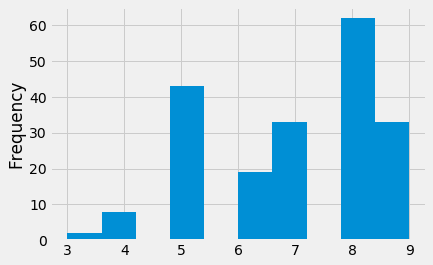

In [30]:
# Score distribution
df.Score.plot.hist()

In [31]:
# mean stats by score values
df.groupby('Score').agg({
    'Annual Income (k$)': 'mean',
    'Age': 'mean',
    'Spending Score (1-100)': 'mean'
}).round(0)

,Annual Income (k$),Age,Spending Score (1-100)
Score,,,
3.0,16.0,20.0,22.0
4.0,53.0,22.0,45.0
5.0,42.0,25.0,53.0
6.0,48.0,37.0,43.0
7.0,55.0,43.0,35.0
8.0,75.0,43.0,57.0
9.0,74.0,52.0,56.0


### Split Segmentation by Gender

In [32]:
# split dataframe by Male and Female (useful for segmentation)
df_male = df[df.Gender == 0][['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_female = df[df.Gender == 1][['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [33]:
# create labels for income, age, score
i_labels = range(1, 4); a_labels = range(1, 6); s_labels = range(1, 4)

# assign these labels to three equal percentile groups 
i_groups = pd.qcut(df_male['Annual Income (k$)'], q=3, labels=i_labels)

# assign these labels to five equal percentile groups 
a_groups = pd.qcut(df_male['Age'], q=5, labels=a_labels)

# assign these labels to three equal percentile groups 
s_groups = pd.qcut(df_male['Spending Score (1-100)'], q=3, labels=s_labels)

# Create new columns 'I', 'A' and 'S'
df_male = df_male.assign(I=i_groups.values, A=a_groups.values, S=s_groups.values)

# create Score and Segment for Male Customers
df_male['Score'] = df_male[['I','A','S']].sum(axis=1)
df_male['Segment'] = (df_male['I'].astype(str)+df_male['A'].astype(str)+df_male['S'].astype(str)).astype(int)

In [34]:
# Create labels for income, age, score
i_labels = range(1, 4); a_labels = range(1, 6); s_labels = range(1, 4)

# assign these labels to three equal percentile groups 
i_groups = pd.qcut(df_female['Annual Income (k$)'], q=3, labels=i_labels)

# assign these labels to five equal percentile groups 
a_groups = pd.qcut(df_female['Age'], q=5, labels=a_labels)

# assign these labels to three equal percentile groups 
s_groups = pd.qcut(df_female['Spending Score (1-100)'], q=3, labels=s_labels)

# Create new columns 'I', 'A' and 'S'
df_female = df_female.assign(I=i_groups.values, A=a_groups.values, S=s_groups.values)

# create Score and Segment for Female Customers
df_female['Score'] = df_female[['I','A','S']].sum(axis=1)
df_female['Segment'] = (df_female['I'].astype(str)+df_female['A'].astype(str)+df_female['S'].astype(str)).astype(int)

##### Male Statistics

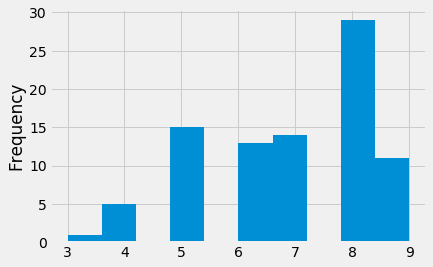

In [35]:
# Score distribution
df_male.Score.plot.hist()

In [36]:
df_male.groupby('Score').agg({
    'Annual Income (k$)': 'mean',
    'Age': 'mean',
    'Spending Score (1-100)': 'mean'
}).round(0)

,Annual Income (k$),Age,Spending Score (1-100)
Score,,,
3.0,15.0,19.0,39.0
4.0,55.0,19.0,44.0
5.0,44.0,24.0,51.0
6.0,55.0,38.0,43.0
7.0,57.0,47.0,26.0
8.0,76.0,45.0,58.0
9.0,74.0,53.0,59.0


##### Female Statistics

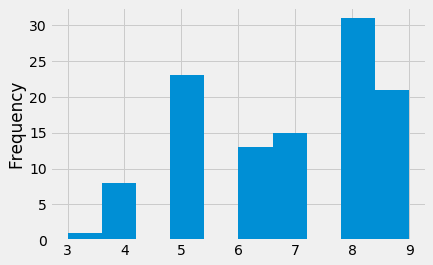

In [37]:
# Score distribution
df_female.Score.plot.hist()

In [38]:
df_female.groupby('Score').agg({
    'Annual Income (k$)': 'mean',
    'Age': 'mean',
    'Spending Score (1-100)': 'mean'
}).round(0)

,Annual Income (k$),Age,Spending Score (1-100)
Score,,,
3.0,16.0,20.0,6.0
4.0,47.0,26.0,42.0
5.0,41.0,25.0,56.0
6.0,44.0,38.0,39.0
7.0,57.0,42.0,48.0
8.0,74.0,41.0,56.0
9.0,76.0,51.0,55.0


## Kmeans Segmentation with New Features

### Elbow Method

In [39]:
# sse for new features
sse = {}
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(df[['I', 'A', 'S', 'Score']])
    sse[k] = kmeans.inertia_

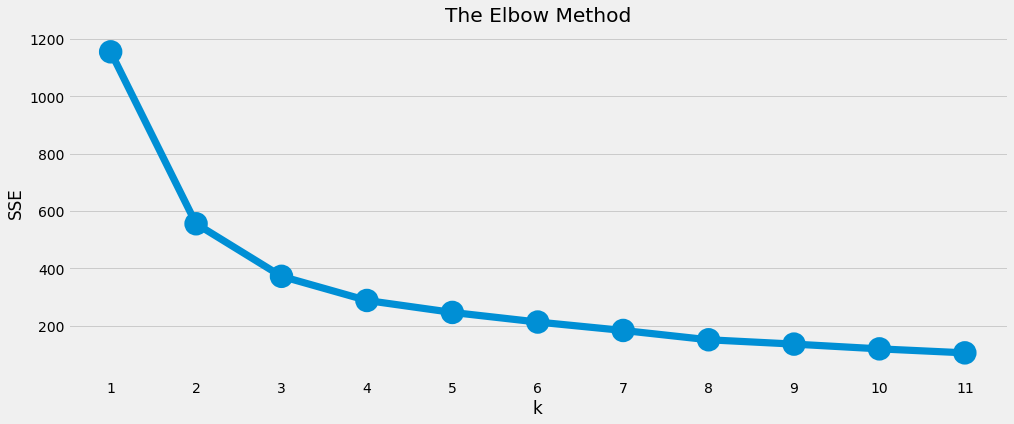

In [40]:
# add the plot title "The Elbow Method"
plt.figure(1 , figsize = (15 ,6))
plt.title('The Elbow Method')

# add X label
plt.xlabel('k')

# add Y label 
plt.ylabel('SSE')

# plot SSE values for each key 
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### KMeans with 4 clusters

In [41]:
# kmeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1) 

kmeans.fit(df[['I', 'A', 'S', 'Score']])

# Extract cluster labels array
cluster_labels = kmeans.labels_

In [42]:
# add labels
df['Clusters_New'] = cluster_labels

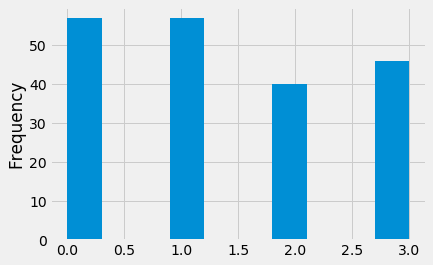

In [43]:
# cluster distribution
df.Clusters_New.plot.hist()

In [44]:
# cluster mean stats
df.groupby("Clusters_New").mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_log,Clusters,Score,Segment
Clusters_New,,,,,,,,
0,0.578947,23.877193,46.859649,54.157895,3.156300,1.561404,4.964912,169.491228
1,0.543860,54.526316,66.754386,39.807018,3.986449,2.333333,8.385965,263.070175
2,0.550000,32.725000,85.825000,81.575000,3.482054,1.950000,8.225000,309.500000
3,0.565217,43.304348,47.891304,30.891304,3.748137,2.586957,6.543478,194.173913


### Relative Importance of Attributes

In [45]:
# relative importancd calculation
cluster_acg = df.groupby("Clusters_New")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

population_avg = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

relative_imp = cluster_acg/population_avg - 1

relative_imp.round(2)

,Age,Annual Income (k$),Spending Score (1-100)
Clusters_New,,,
0,-0.39,-0.23,0.08
1,0.40,0.10,-0.21
2,-0.16,0.42,0.62
3,0.11,-0.21,-0.38


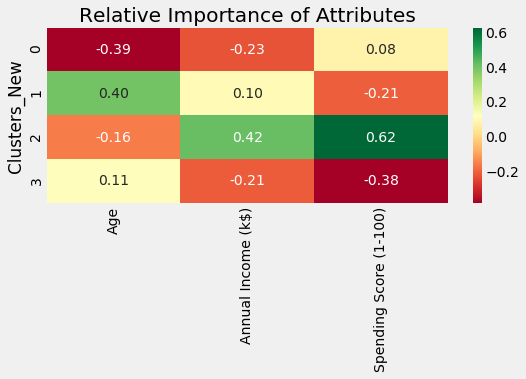

In [46]:
# plot relative importance heatmap
plt.figure(figsize=(8,3))
plt.title('Relative Importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()